7장 코드

In [1]:
visitors_to_A = 1300
visitors_to_B = 1275
conversions_from_A = 120
conversions_from_B = 125

In [2]:
from scipy.stats import beta
alpha_prior = 1
beta_prior = 1
posterior_A = beta(alpha_prior + conversions_from_A,
beta_prior + visitors_to_A - conversions_from_A)
posterior_B = beta(alpha_prior + conversions_from_B,
beta_prior + visitors_to_B - conversions_from_B)


In [3]:
samples = 20000 # We want this to be large to get a better approximation.
samples_posterior_A = posterior_A.rvs(samples)
samples_posterior_B = posterior_B.rvs(samples)
print ((samples_posterior_A > samples_posterior_B).mean())

0.3106


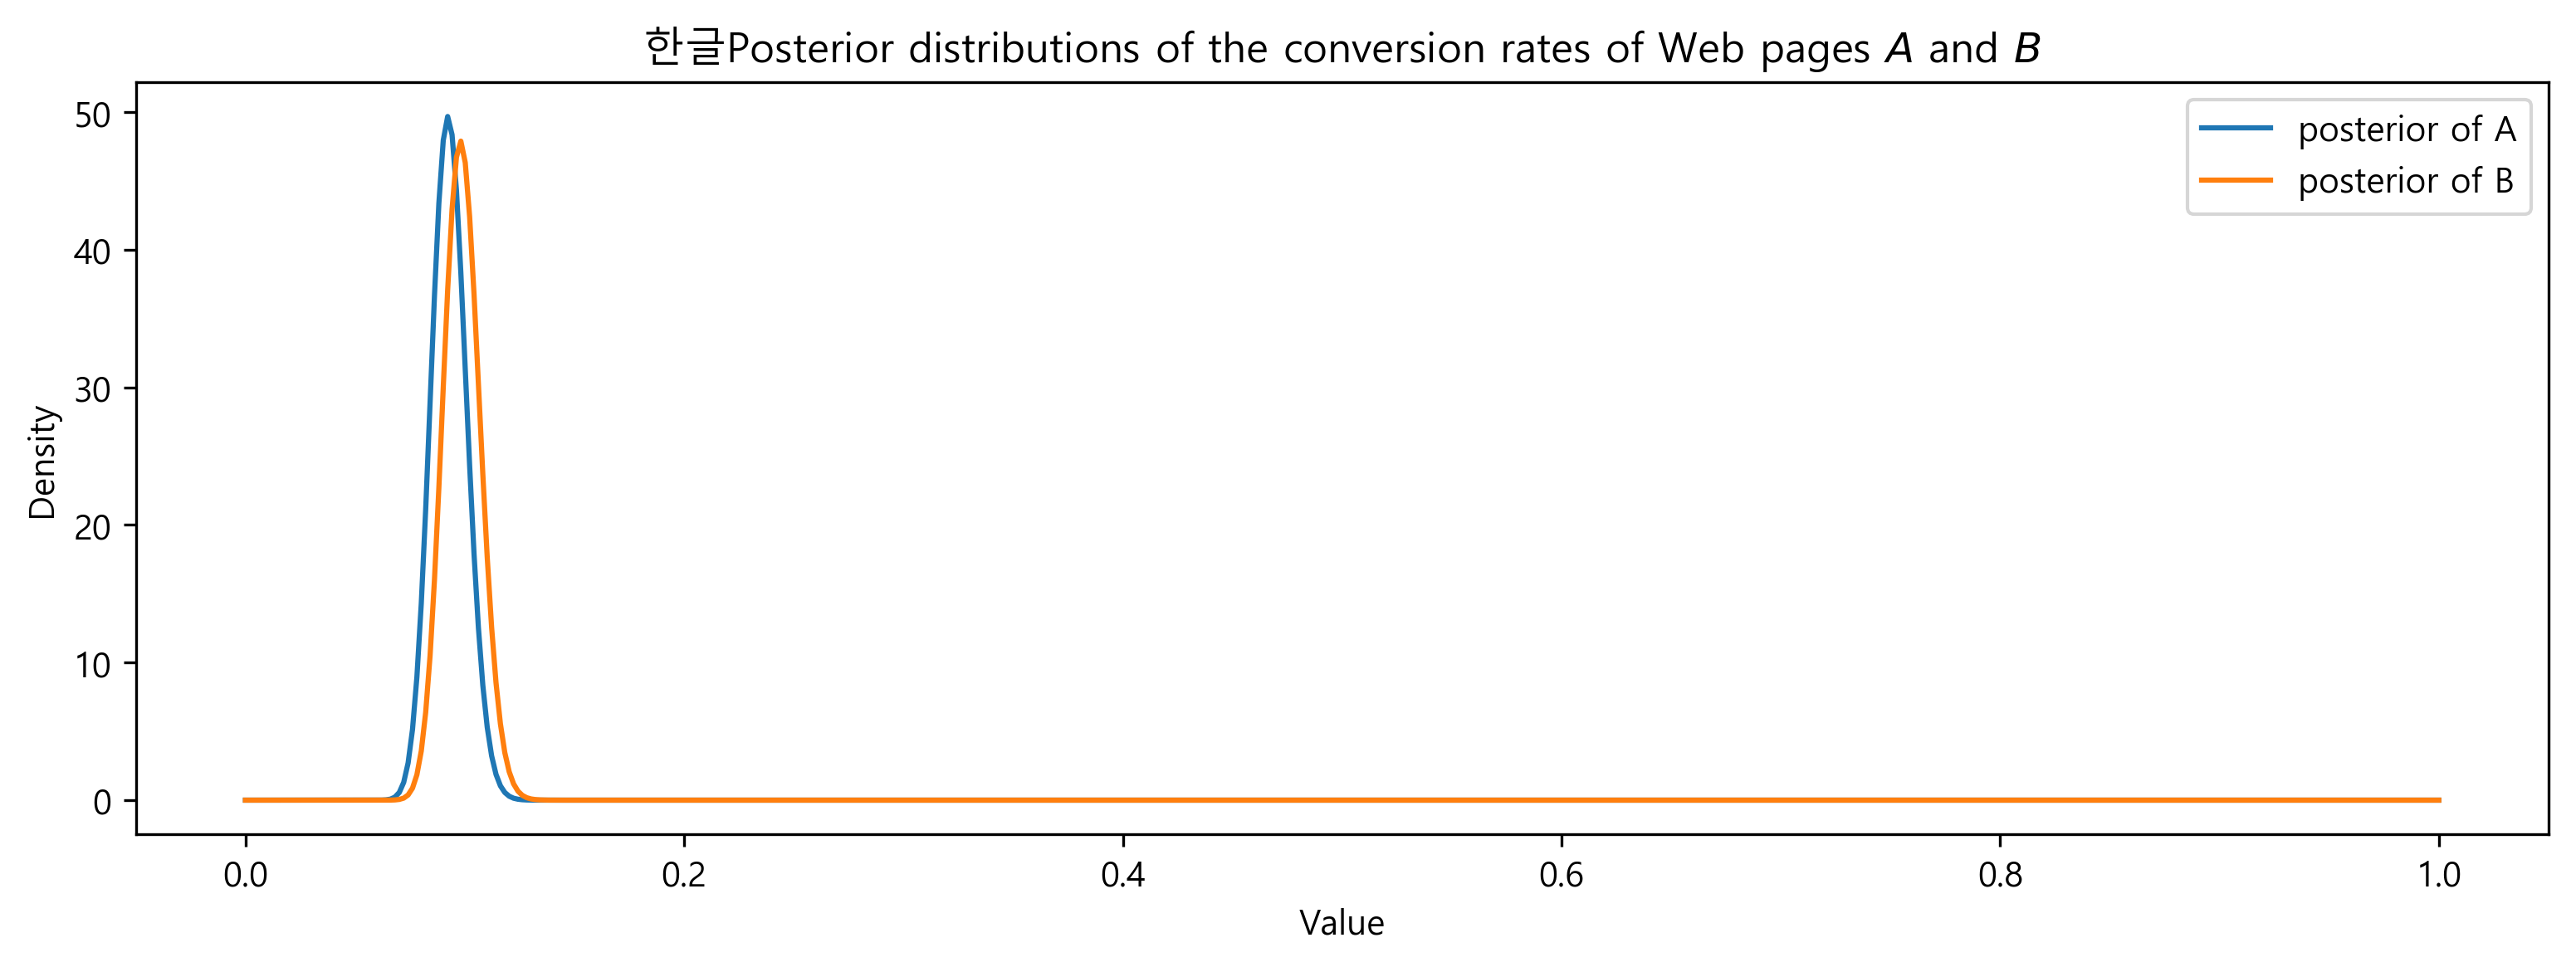

In [4]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
matplotlib.rc('font', family='Malgun Gothic')  # 그림 한글 폰트 지정, 맑은 고딕
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
x = np.linspace(0,1, 500)
plt.plot(x, posterior_A.pdf(x), label='posterior of A')
plt.plot(x, posterior_B.pdf(x), label='posterior of B')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("한글Posterior distributions of the conversion rates of Web pages $A$ and $B$")
plt.legend();



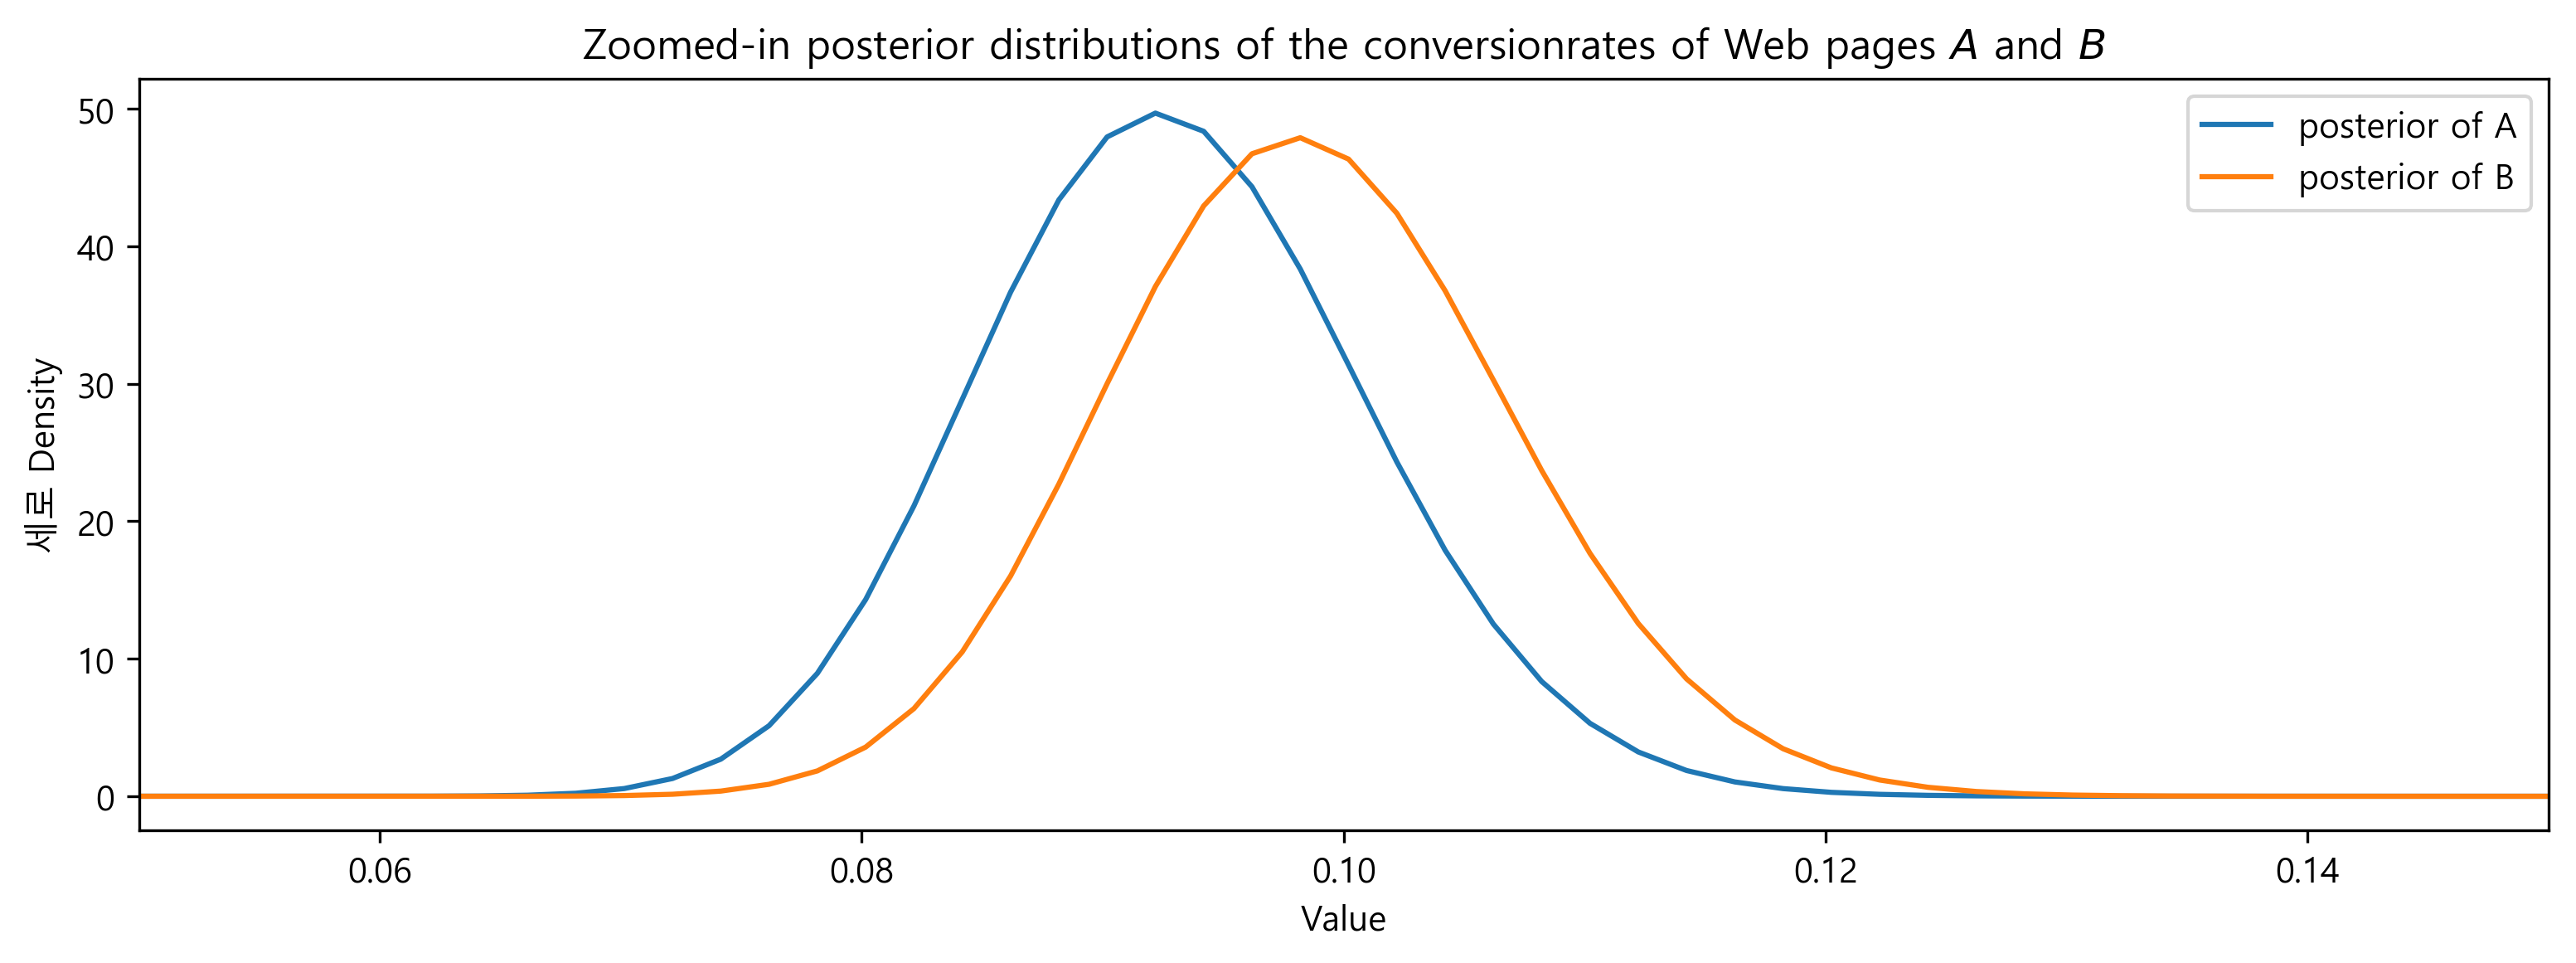

In [5]:
plt.plot(x, posterior_A.pdf(x), label='posterior of A')
plt.plot(x, posterior_B.pdf(x), label='posterior of B')
plt.xlim(0.05, 0.15)
plt.xlabel('Value')
plt.ylabel('세로 Density')
plt.title("Zoomed-in posterior distributions of the conversion\
rates of Web pages $A$ and $B$")
plt.legend();

In [6]:
from numpy.random import multinomial
P = [0.5, 0.2, 0.3]
N = 1
print (multinomial(N, P))

[1 0 0]


In [7]:
N = 10
print (multinomial(N, P))

[4 2 4]


In [8]:
from numpy.random import dirichlet
sample = dirichlet([1,1]) # [1,1] is equivalent to a Beta(1,1)
# distribution.
print (sample)
print (sample.sum())

[ 0.30478499  0.69521501]
1.0


In [9]:
sample = dirichlet([1,1,1,1])
print (sample)
print (sample.sum())

[ 0.04179426  0.36092145  0.39099324  0.20629105]
1.0


In [10]:
N = 1000
N_79 = 10
N_49 = 46
N_25 = 80
N_0 = N - (N_79 + N_49 + N_49)
observations = np.array([N_79, N_49, N_25, N_0])
prior_parameters = np.array([1,1,1,1])
posterior_samples = dirichlet(prior_parameters + observations,
size=10000)
print ("한글 Two random samples from the posterior:")
print (posterior_samples[0])
print (posterior_samples[1])

한글 Two random samples from the posterior:
[ 0.00675587  0.04536021  0.08579392  0.86209   ]
[ 0.01357047  0.04970312  0.08405891  0.8526675 ]


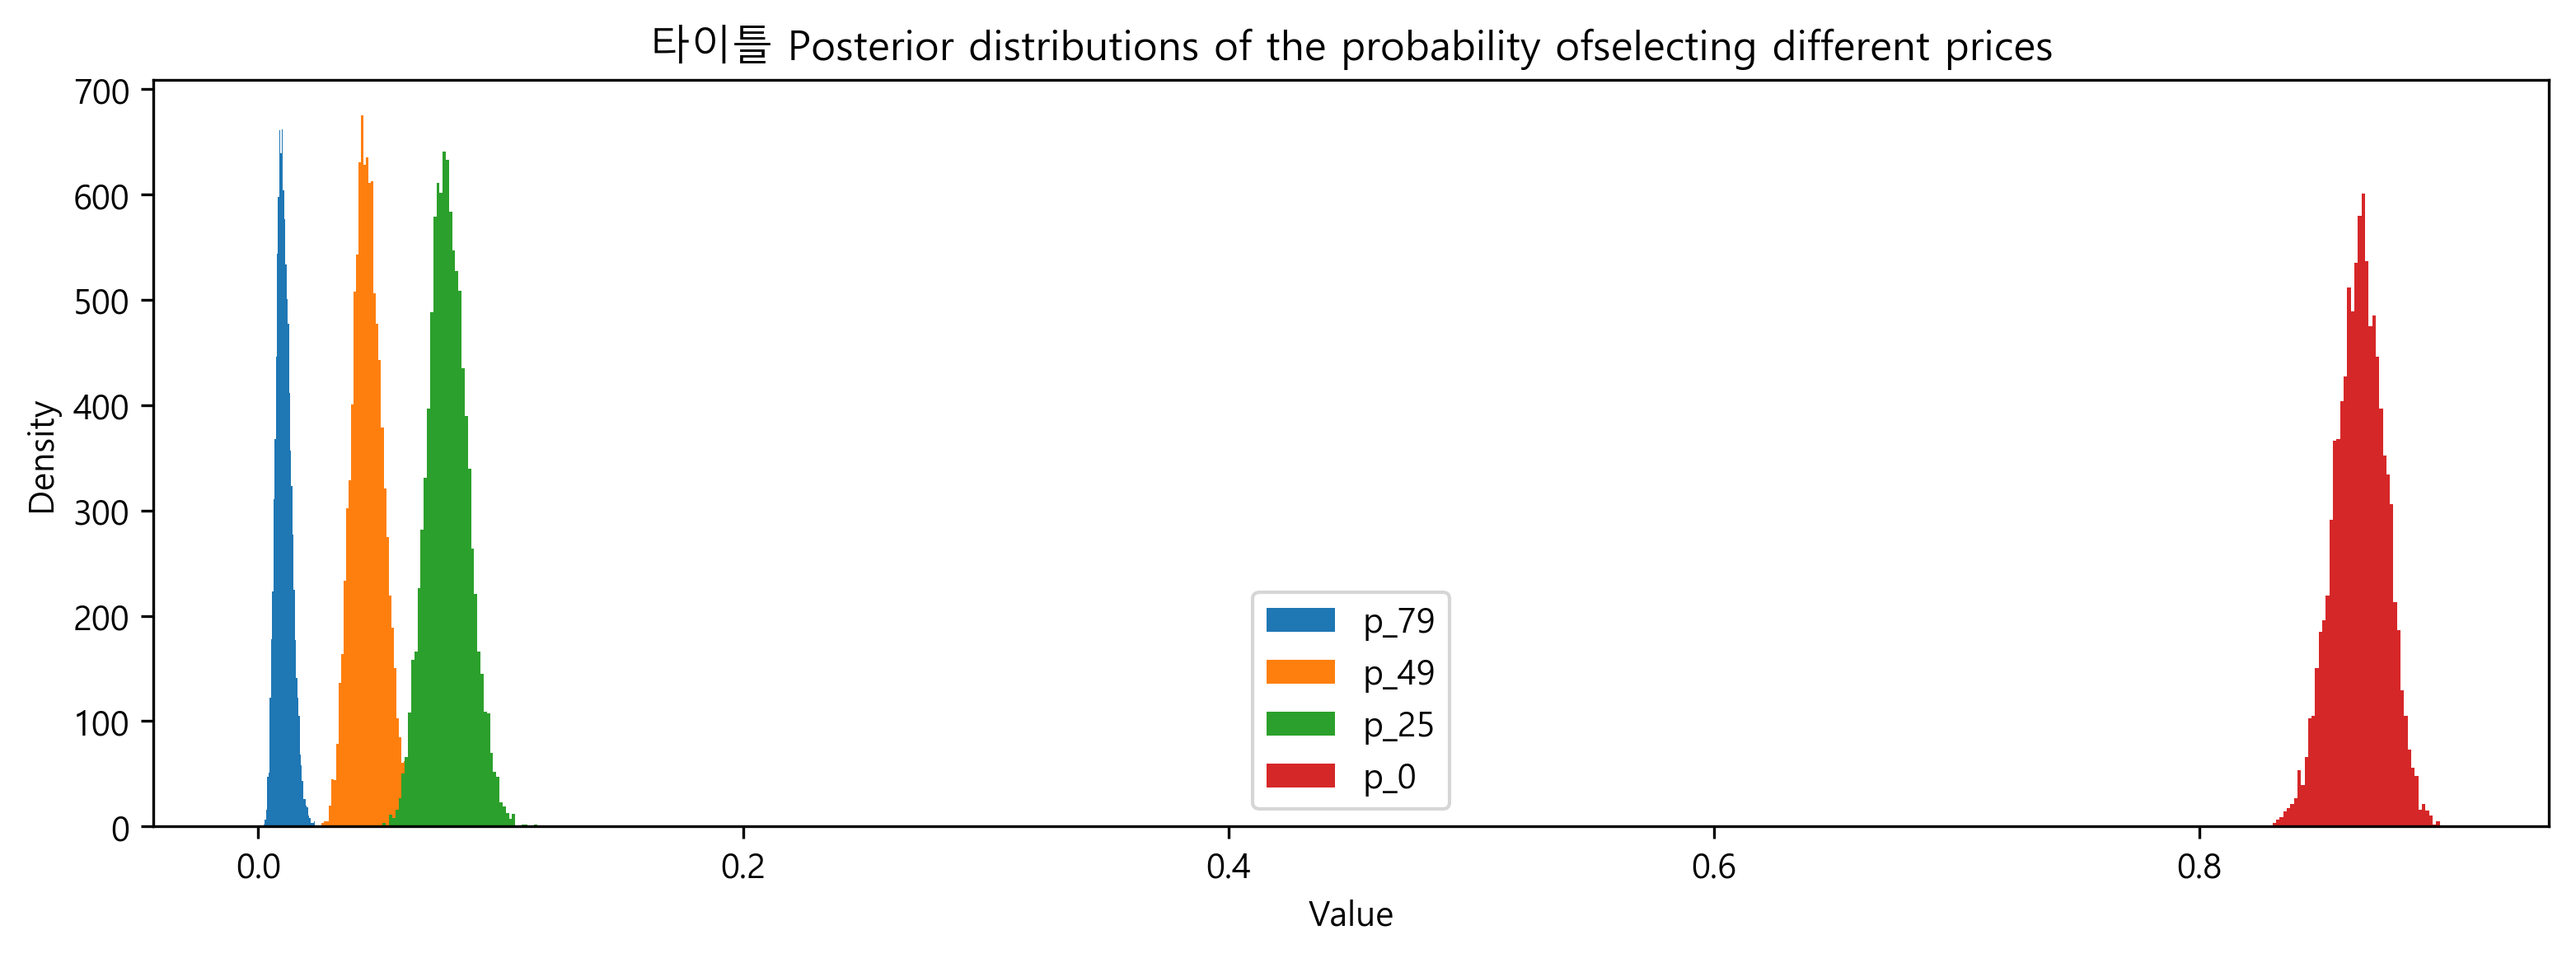

In [11]:
for i, label in enumerate(['p_79', 'p_49', 'p_25', 'p_0']):
    ax = plt.hist(posterior_samples[:,i], bins=50,
label=label, histtype='stepfilled')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("타이틀 Posterior distributions of the probability of\
selecting different prices")
plt.legend();

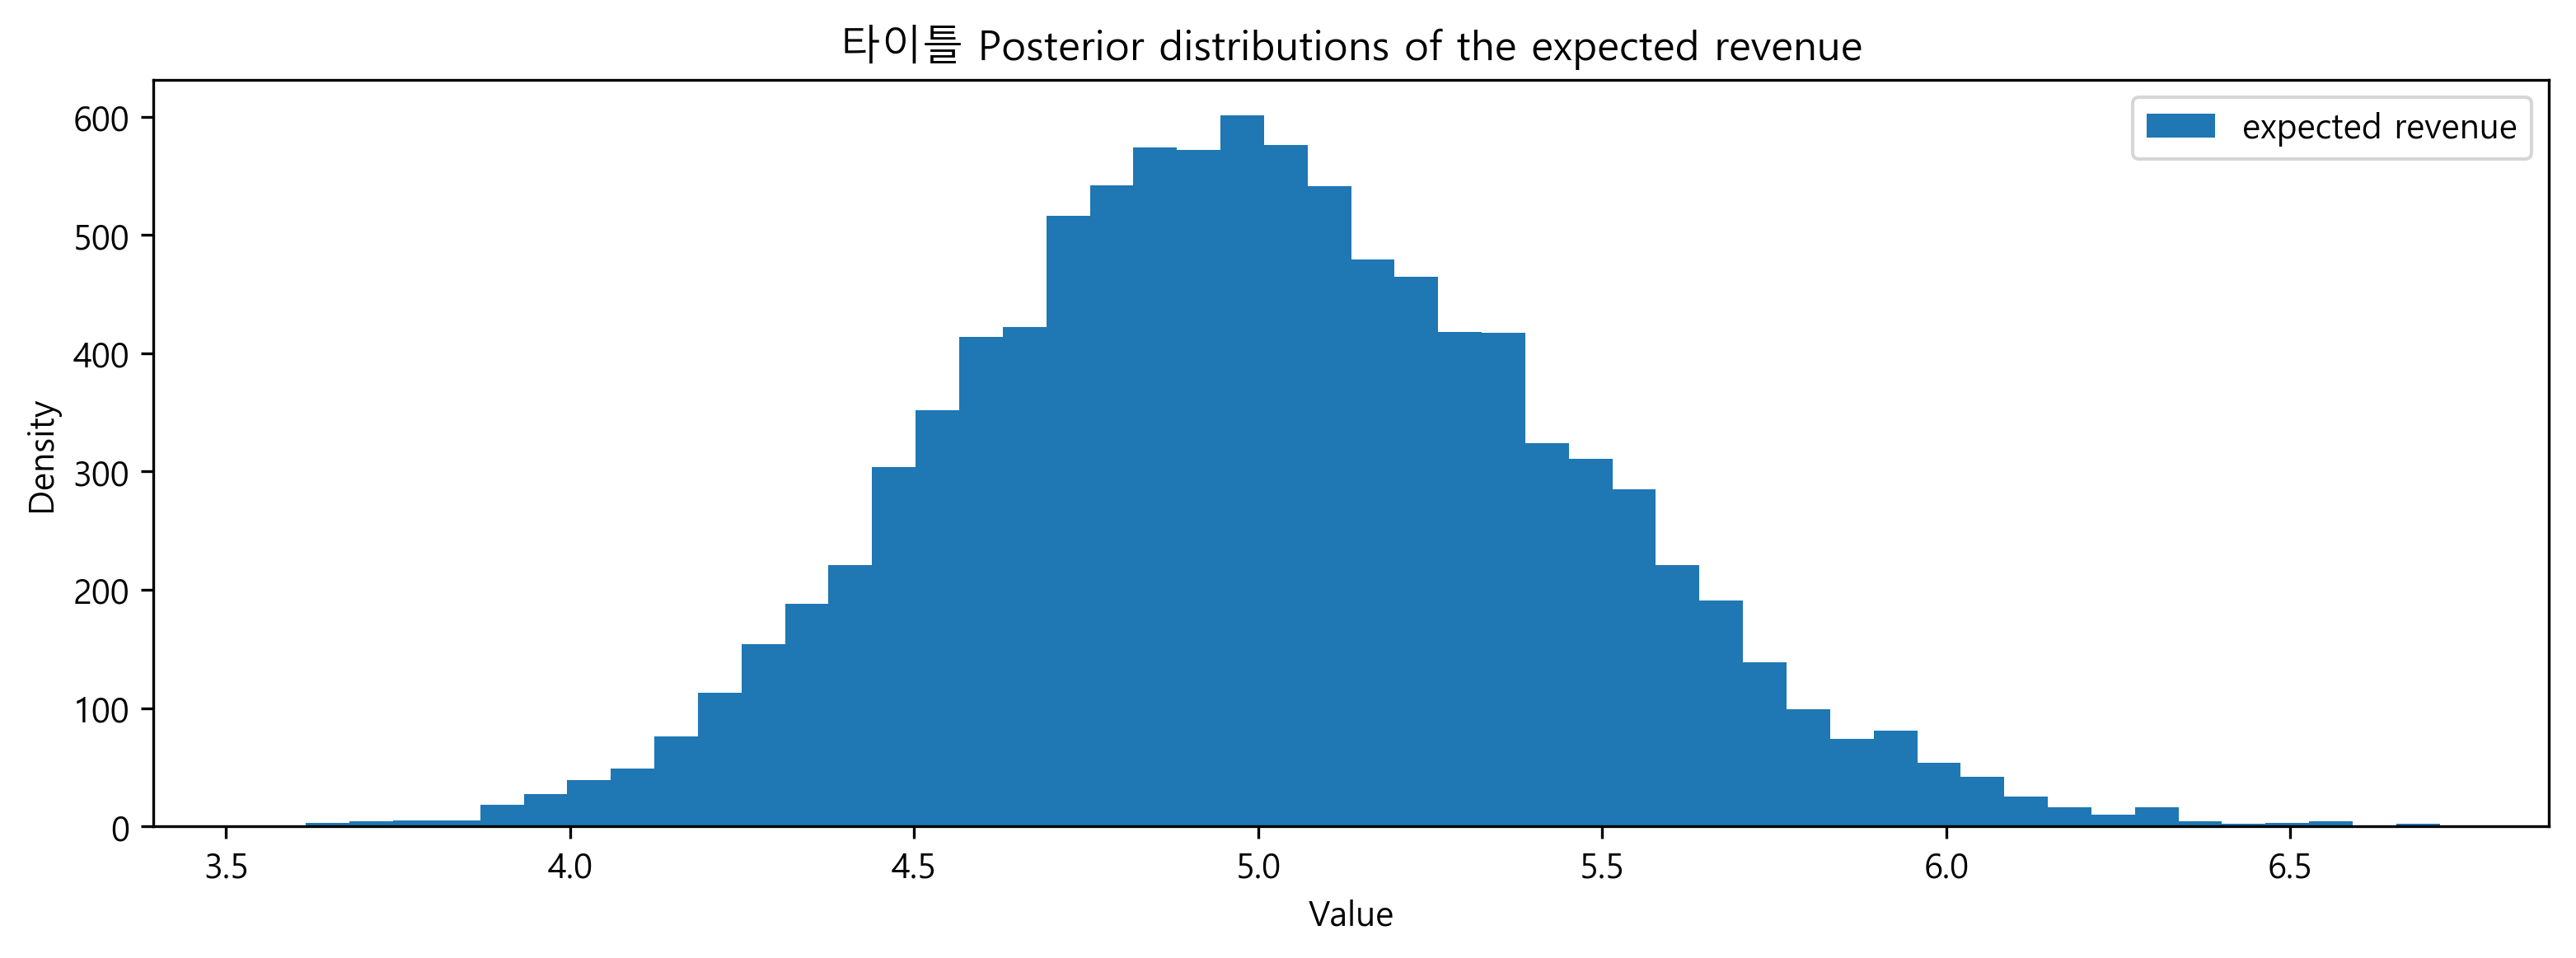

In [12]:
def expected_revenue(P):
    return 79*P[:,0] + 49*P[:,1] + 25*P[:,2] + 0*P[:,3]

#posterior_expected_revenue = expected_value(posterior_samples)
#코드 수정: value -> revenue
#제대로 고친 것이 맞는지 확인 부탁드립니다.
posterior_expected_revenue = expected_revenue(posterior_samples)

plt.hist(posterior_expected_revenue, histtype='stepfilled',label='expected revenue', bins=50)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("타이틀 Posterior distributions of the expected revenue")
plt.legend();

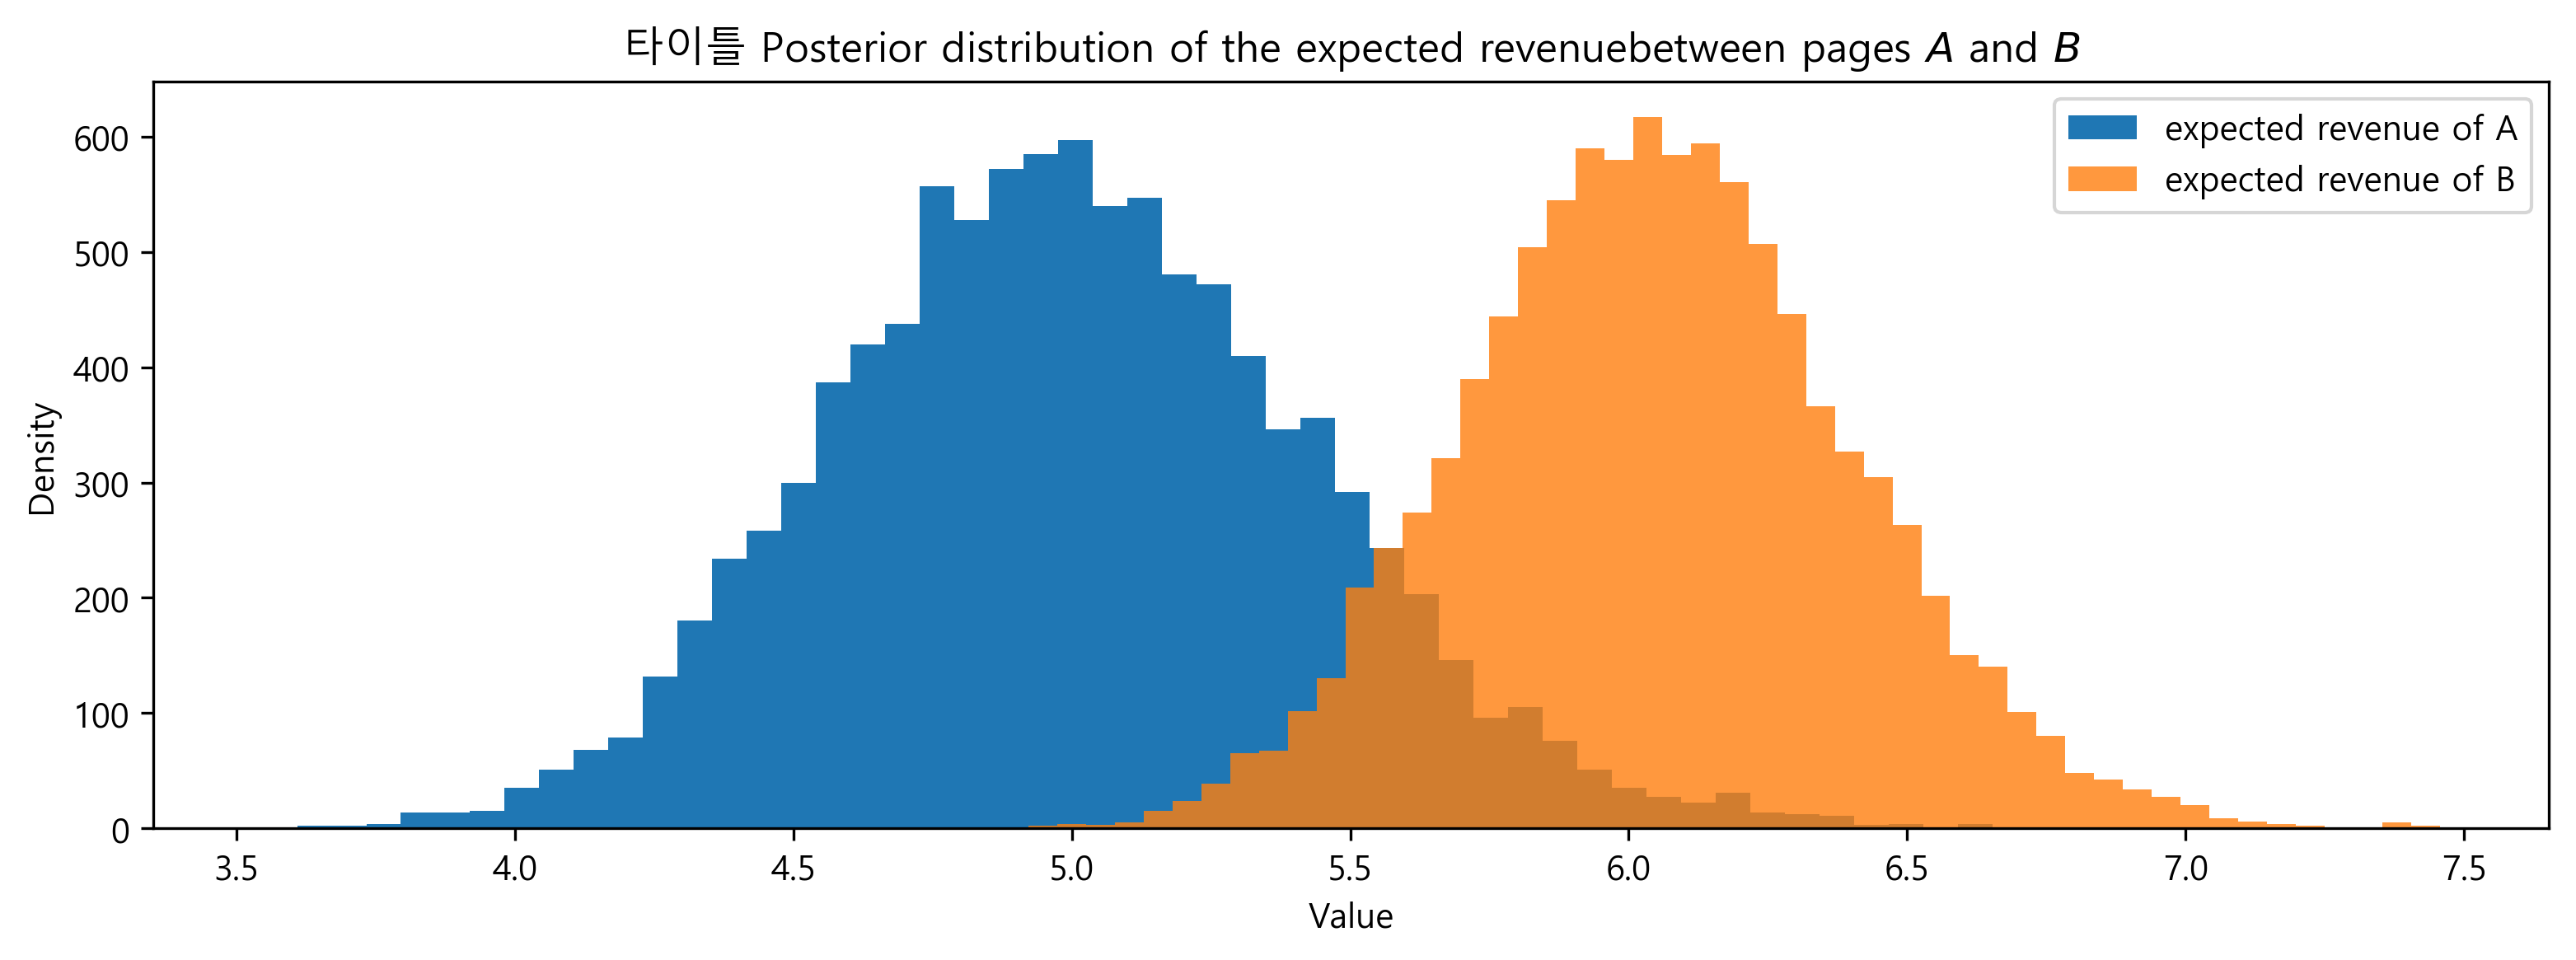

In [13]:
N_A = 1000
N_A_79 = 10
N_A_49 = 46
N_A_25 = 80
N_A_0 = N_A - (N_A_79 + N_A_49 + N_A_49)
observations_A = np.array([N_A_79, N_A_49, N_A_25, N_A_0])
N_B = 2000
N_B_79 = 45
N_B_49 = 84
N_B_25 = 200
N_B_0 = N_B - (N_B_79 + N_B_49 + N_B_49)
observations_B = np.array([N_B_79, N_B_49, N_B_25, N_B_0])
prior_parameters = np.array([1,1,1,1])
posterior_samples_A = dirichlet(prior_parameters + observations_A,
size=10000)
posterior_samples_B = dirichlet(prior_parameters + observations_B,
size=10000)


#posterior_expected_revenue_A = expected_value(posterior_samples_A)
#posterior_expected_revenue_B = expected_value(posterior_samples_B)
# 위 두 코드도 수정하였습니다. value -> revenue
# 확인 부탁합니다.
posterior_expected_revenue_A = expected_revenue(posterior_samples_A)
posterior_expected_revenue_B = expected_revenue(posterior_samples_B)


plt.hist(posterior_expected_revenue_A, histtype='stepfilled',
label='expected revenue of A', bins=50)
plt.hist(posterior_expected_revenue_B, histtype='stepfilled',
label='expected revenue of B', bins=50, alpha=0.8)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("타이틀 Posterior distribution of the expected revenue\
between pages $A$ and $B$")
plt.legend();

In [14]:
p = (posterior_expected_revenue_B > posterior_expected_revenue_A).mean()
print ("Probability that page B has a higher revenue than page A: %.3f"%p)

Probability that page B has a higher revenue than page A: 0.971


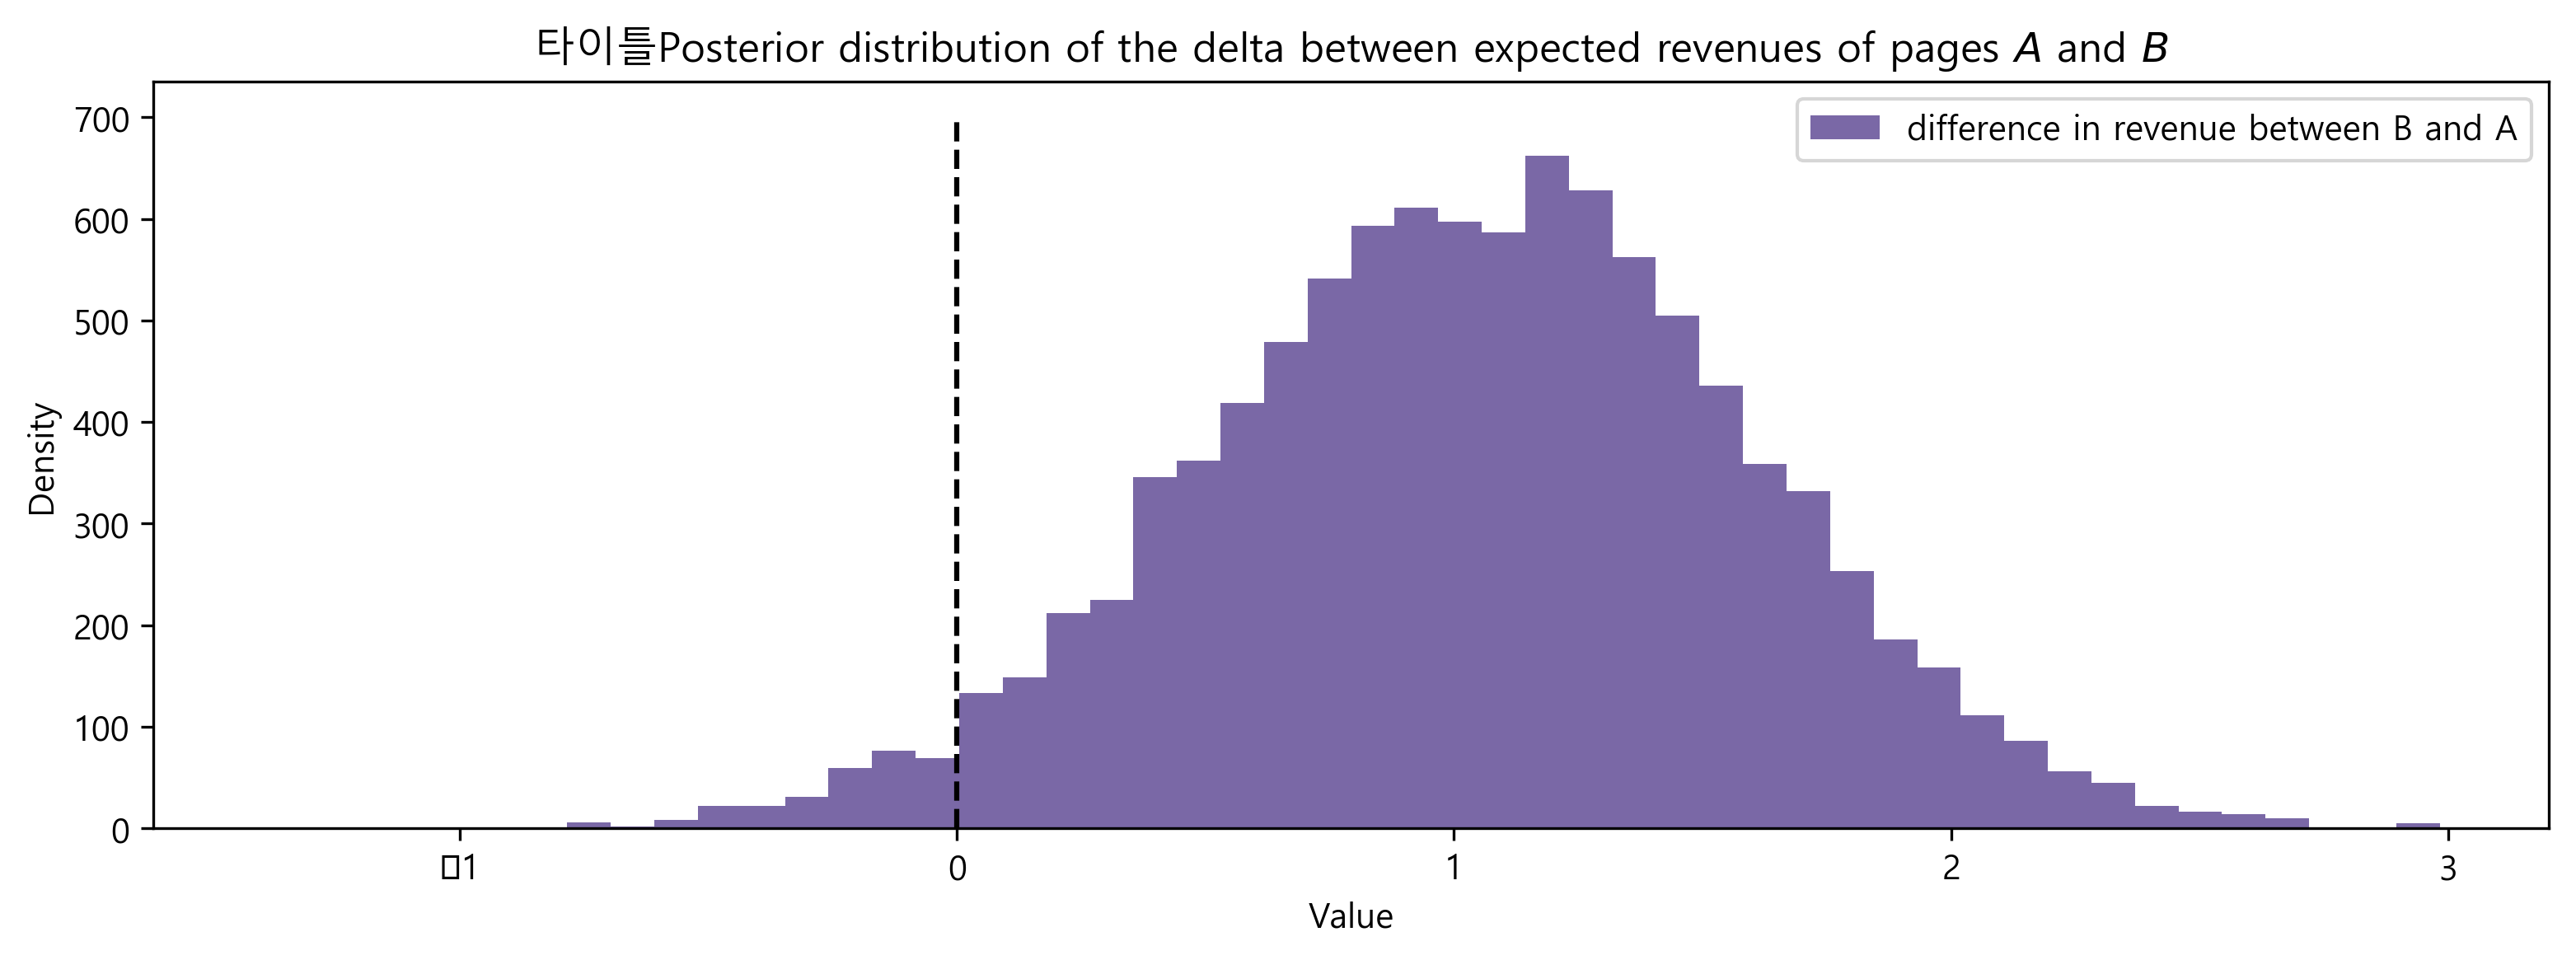

In [15]:
posterior_diff = posterior_expected_revenue_B - posterior_expected_revenue_A
plt.hist(posterior_diff, histtype='stepfilled', color='#7A68A6',
label='difference in revenue between B and A', bins=50)
plt.vlines(0, 0, 700, linestyles='--')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("타이틀Posterior distribution of the delta between expected revenues of pages $A$ and $B$")
plt.legend();

In [16]:
N = 250
mu_A, std_A = 30, 4
mu_B, std_B = 26, 7
# create durations (seconds) users are on the pages for
durations_A = np.random.normal(mu_A, std_A, size=N)
durations_B = np.random.normal(mu_B, std_B, size=N)

print (durations_A[:8])
print (durations_B[:8])

[ 30.60691731  31.30570854  32.27731639  31.64148992  27.97110436
  33.71255902  25.35377741  24.57539892]
[ 29.60458624  32.52781905  31.98697355  19.59478783  20.37025341
  23.74844076  27.70716363  32.57579835]


In [17]:
import pymc as pm
pooled_mean = np.r_[durations_A, durations_B].mean()
pooled_std = np.r_[durations_A, durations_B].std()
tau = 1./np.sqrt(1000.*pooled_std) # PyMC uses a precision
# parameter, 1/sigma**2
mu_A = pm.Normal("mu_A", pooled_mean, tau)
mu_B = pm.Normal("mu_B", pooled_mean, tau)

In [18]:
std_A = pm.Uniform("std_A", pooled_std/1000., 1000.*pooled_std)
std_B = pm.Uniform("std_B", pooled_std/1000., 1000.*pooled_std)

In [19]:
nu_minus_1 = pm.Exponential("nu-1", 1./29)

In [20]:
obs_A = pm.NoncentralT("obs_A", mu_A, 1.0/std_A**2, nu_minus_1 + 1,
observed=True, value=durations_A)
obs_B = pm.NoncentralT("obs_B", mu_B, 1.0/std_B**2, nu_minus_1 + 1,
observed=True, value=durations_B)
mcmc = pm.MCMC([obs_A, obs_B, mu_A, mu_B, std_A, std_B, nu_minus_1])
mcmc.sample(25000,10000)

 [-----------------100%-----------------] 25000 of 25000 complete in 8.4 sec

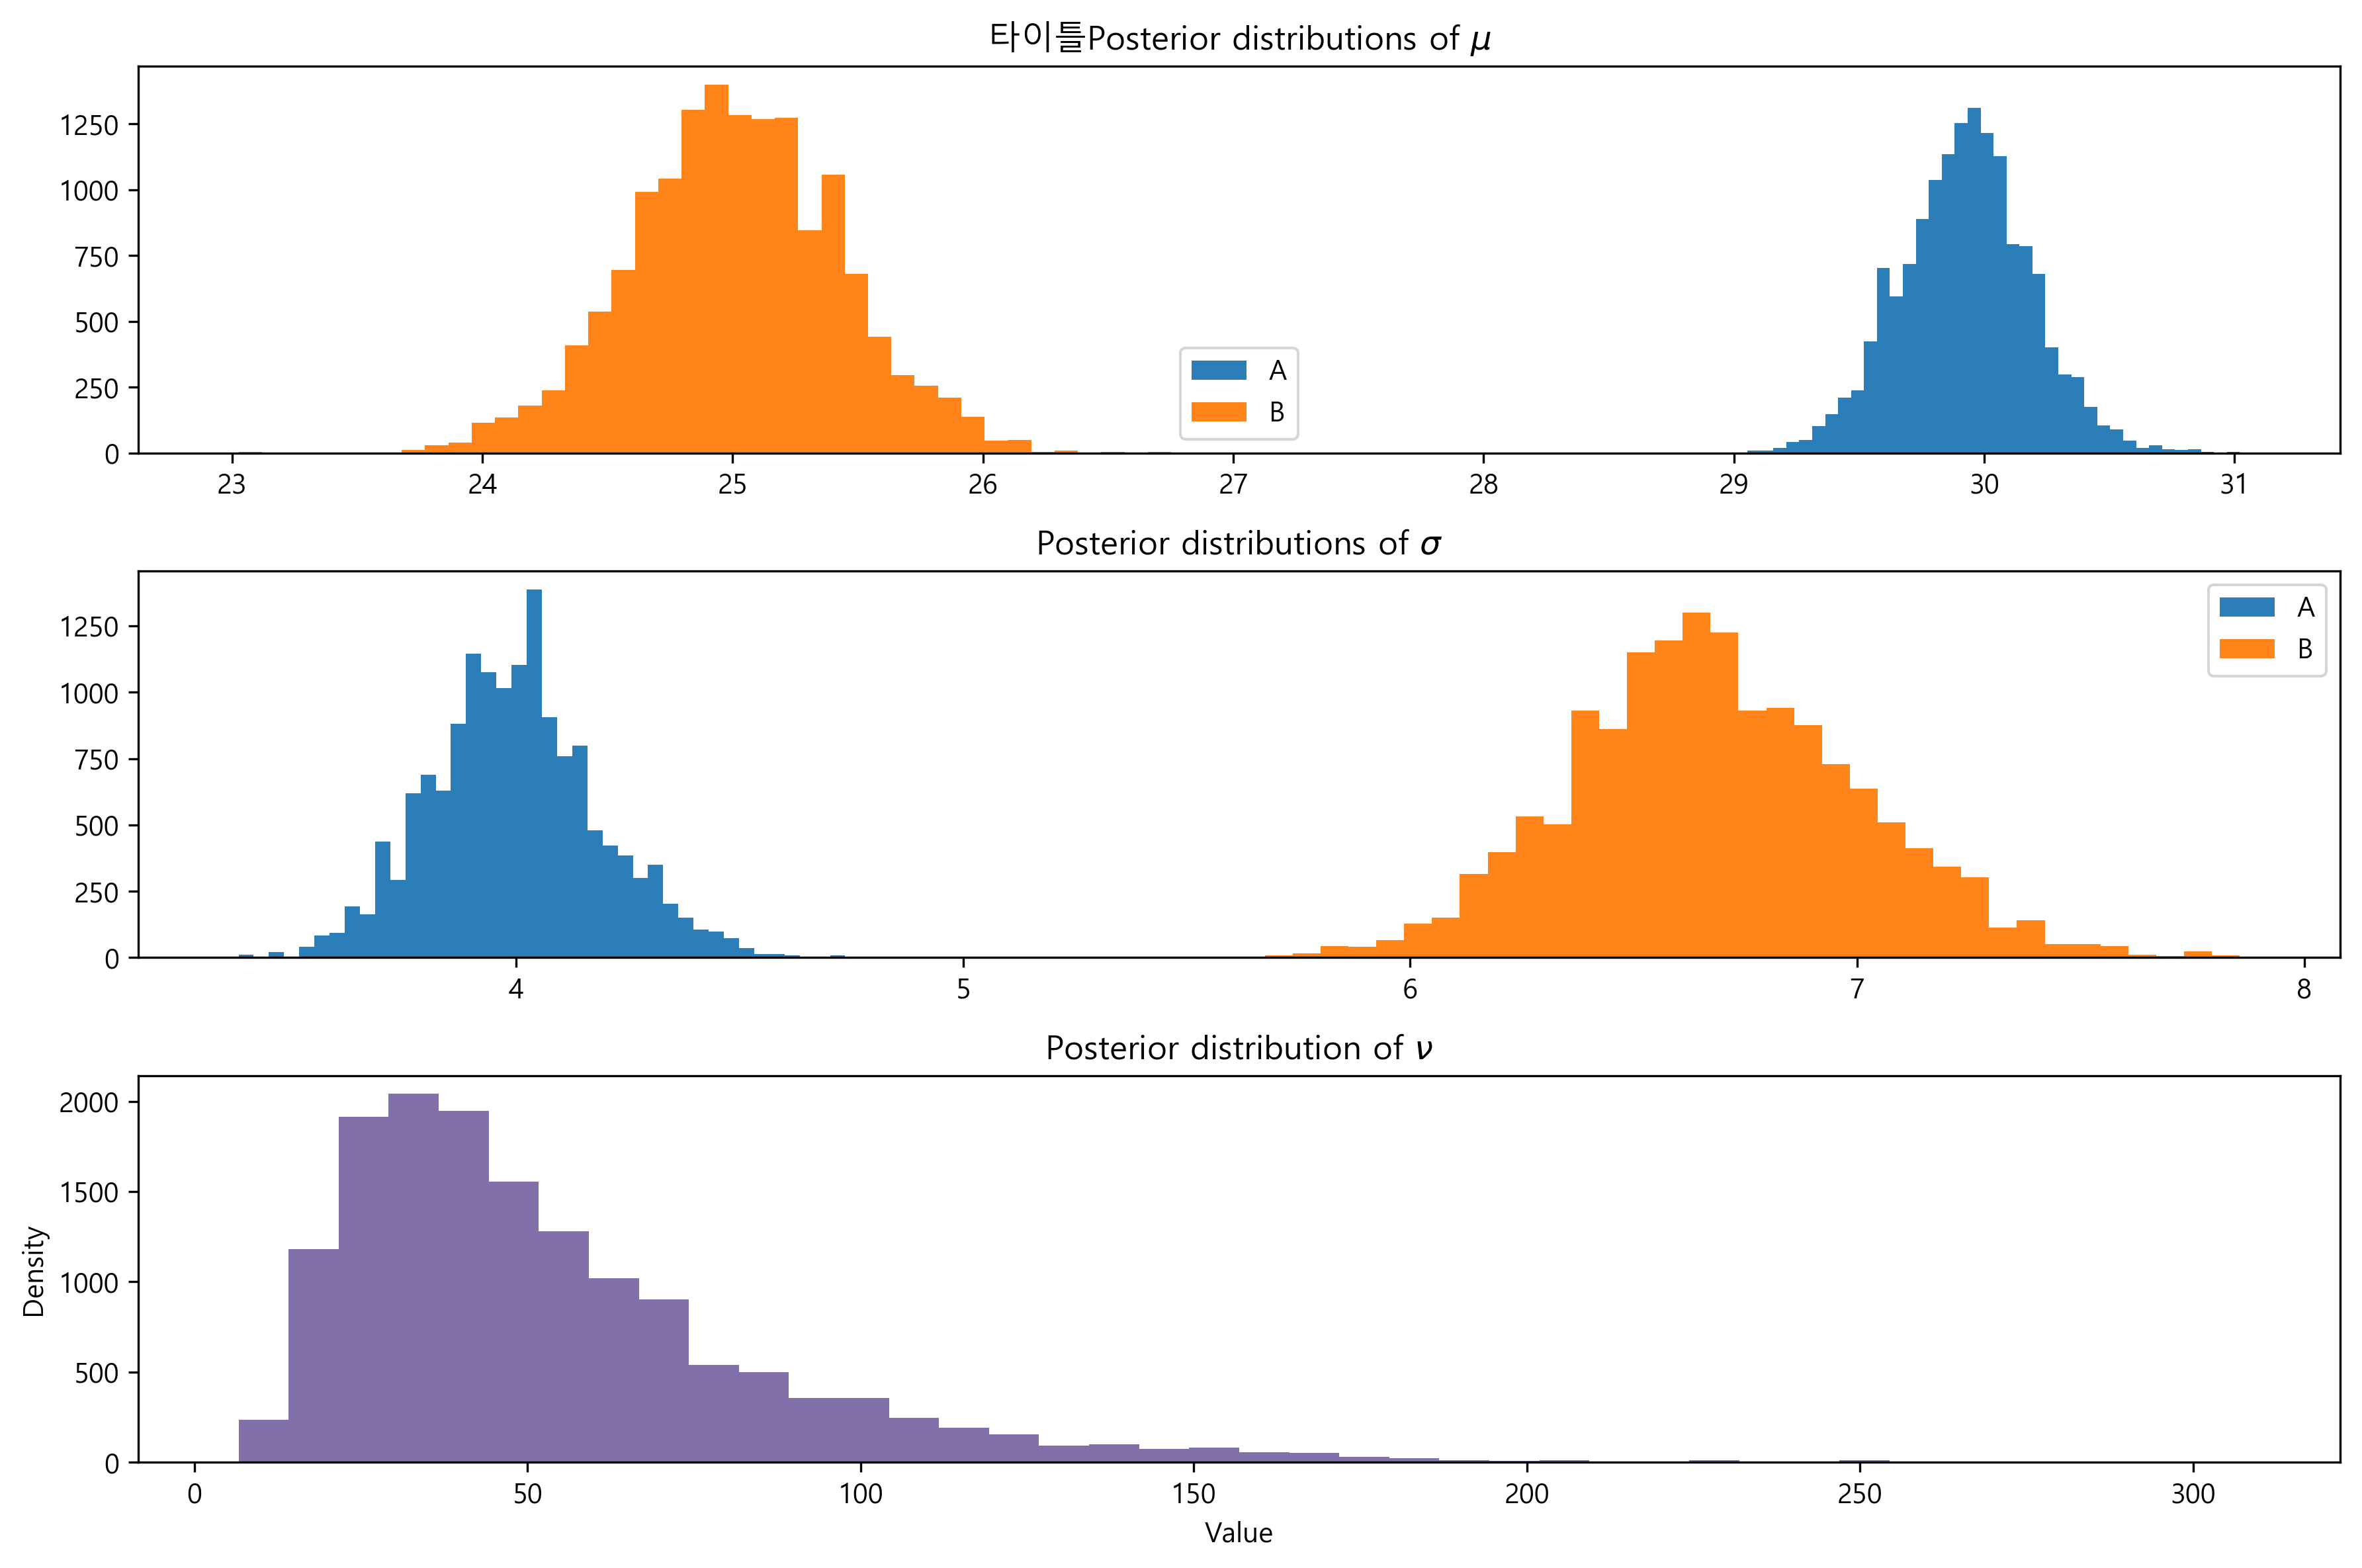

In [21]:
mu_A_trace, mu_B_trace = mcmc.trace('mu_A')[:], mcmc.trace('mu_B')[:]
std_A_trace, std_B_trace = mcmc.trace('std_A')[:], mcmc.trace('std_B')[:]
nu_trace = mcmc.trace("nu-1")[:] + 1
figsize(12,8)
def _hist(data, label, **kwargs):
    return plt.hist(data, bins=40, histtype='stepfilled',
alpha=.95, label=label, **kwargs)
ax = plt.subplot(3,1,1)
_hist(mu_A_trace,'A')
_hist(mu_B_trace,'B')
plt.legend()
plt.title('타이틀Posterior distributions of $\mu$')
ax = plt.subplot(3,1,2)
_hist(std_A_trace, 'A')
_hist(std_B_trace, 'B')
plt.legend()
plt.title('Posterior distributions of $\sigma$')
ax = plt.subplot(3,1,3)
_hist(nu_trace,'', color='#7A68A6')
plt.title(r'Posterior distribution of $\nu$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.tight_layout();

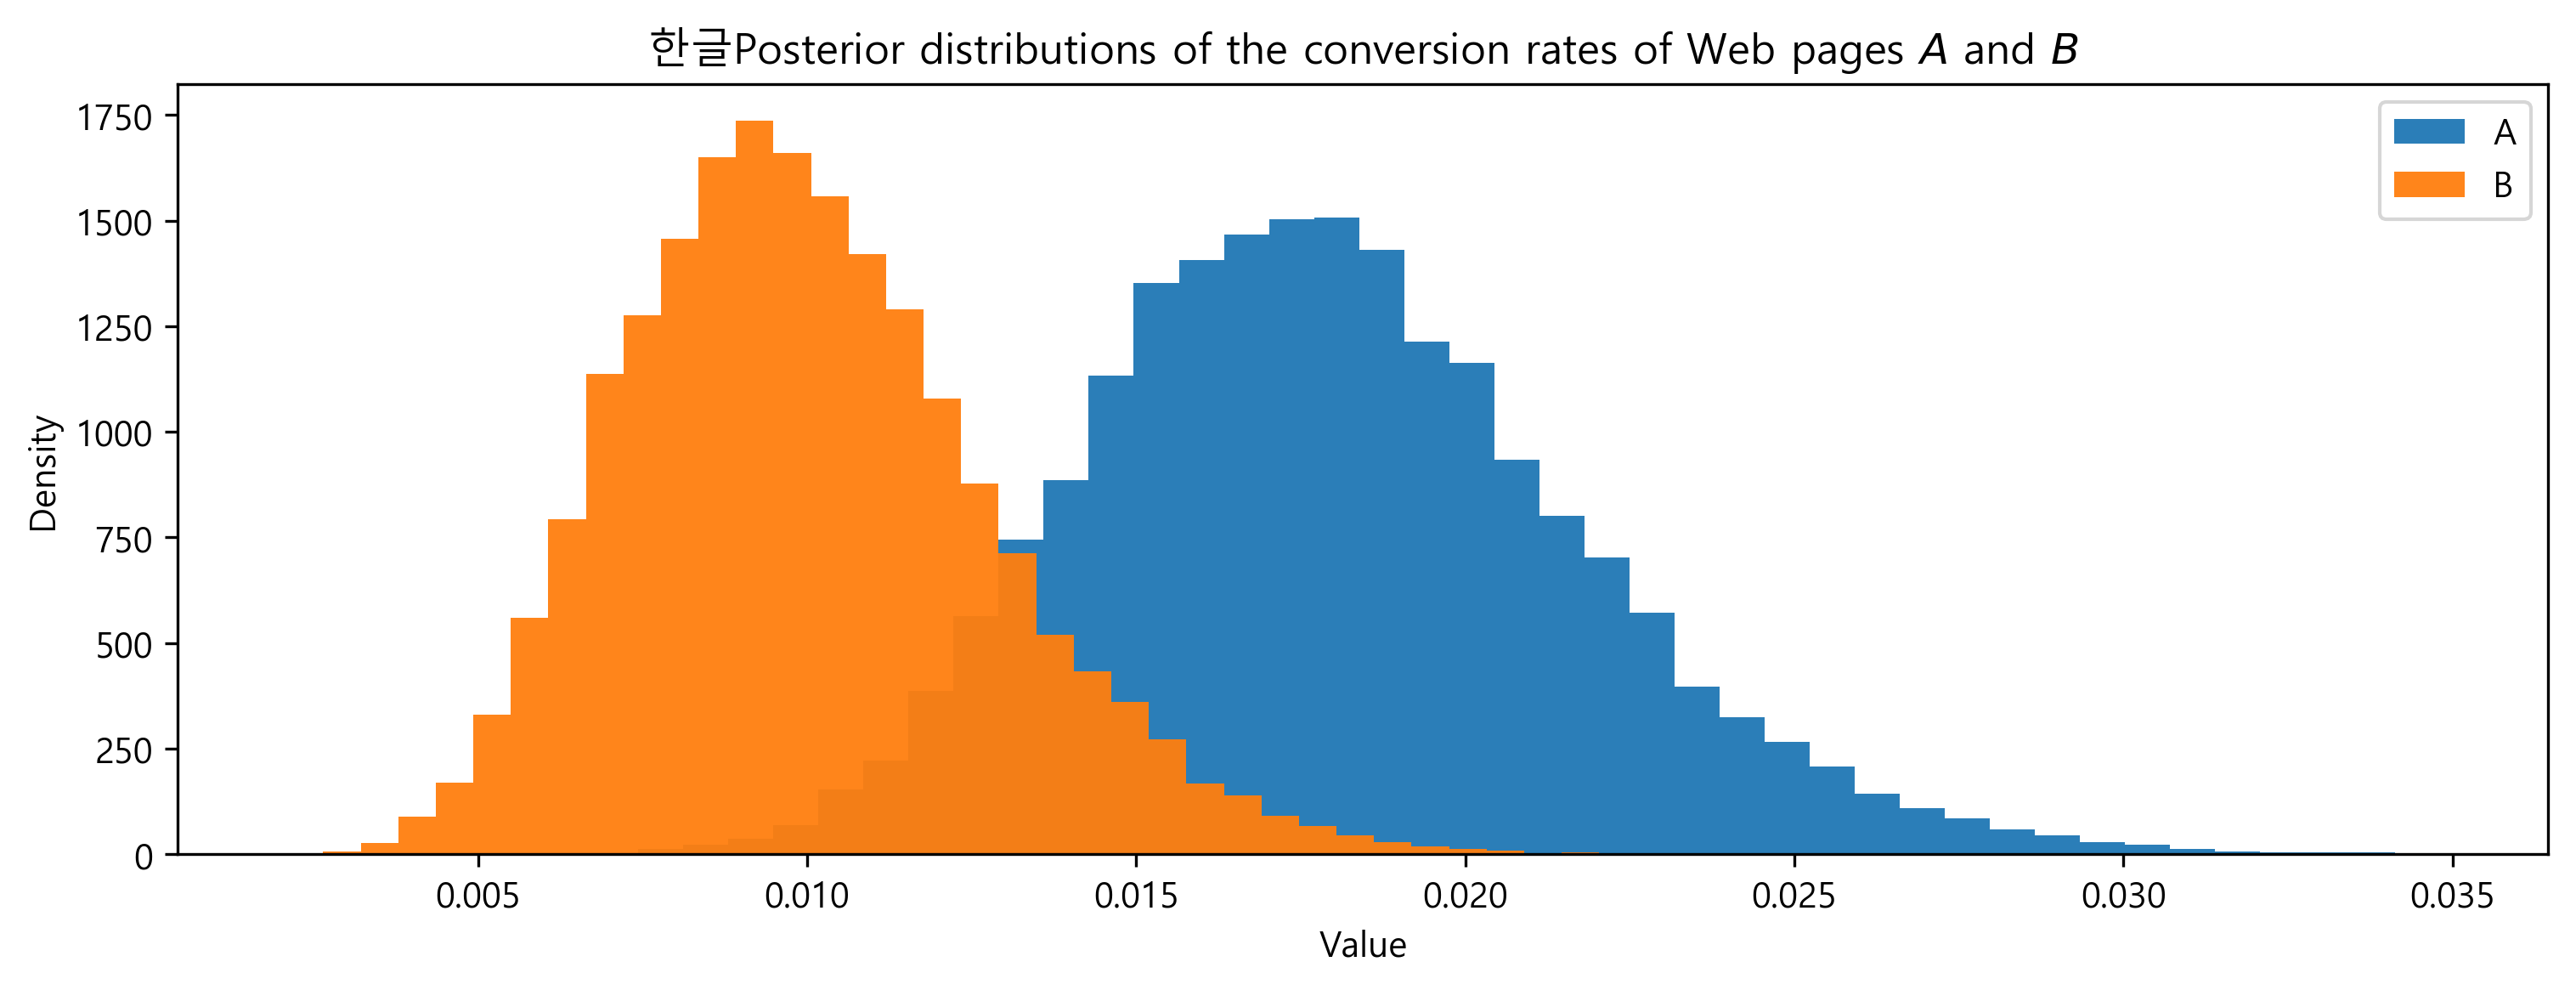

In [22]:
figsize(12,4)
visitors_to_A = 1275
visitors_to_B = 1300
conversions_from_A = 22
conversions_from_B = 12
alpha_prior = 1
beta_prior = 1
posterior_A = beta(alpha_prior + conversions_from_A,
beta_prior + visitors_to_A - conversions_from_A)
posterior_B = beta(alpha_prior + conversions_from_B,
beta_prior + visitors_to_B - conversions_from_B)
samples = 20000
samples_posterior_A = posterior_A.rvs(samples)
samples_posterior_B = posterior_B.rvs(samples)
_hist(samples_posterior_A, 'A')
_hist(samples_posterior_B, 'B')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("한글Posterior distributions of the conversion rates of Web pages $A$ and $B$")
plt.legend();

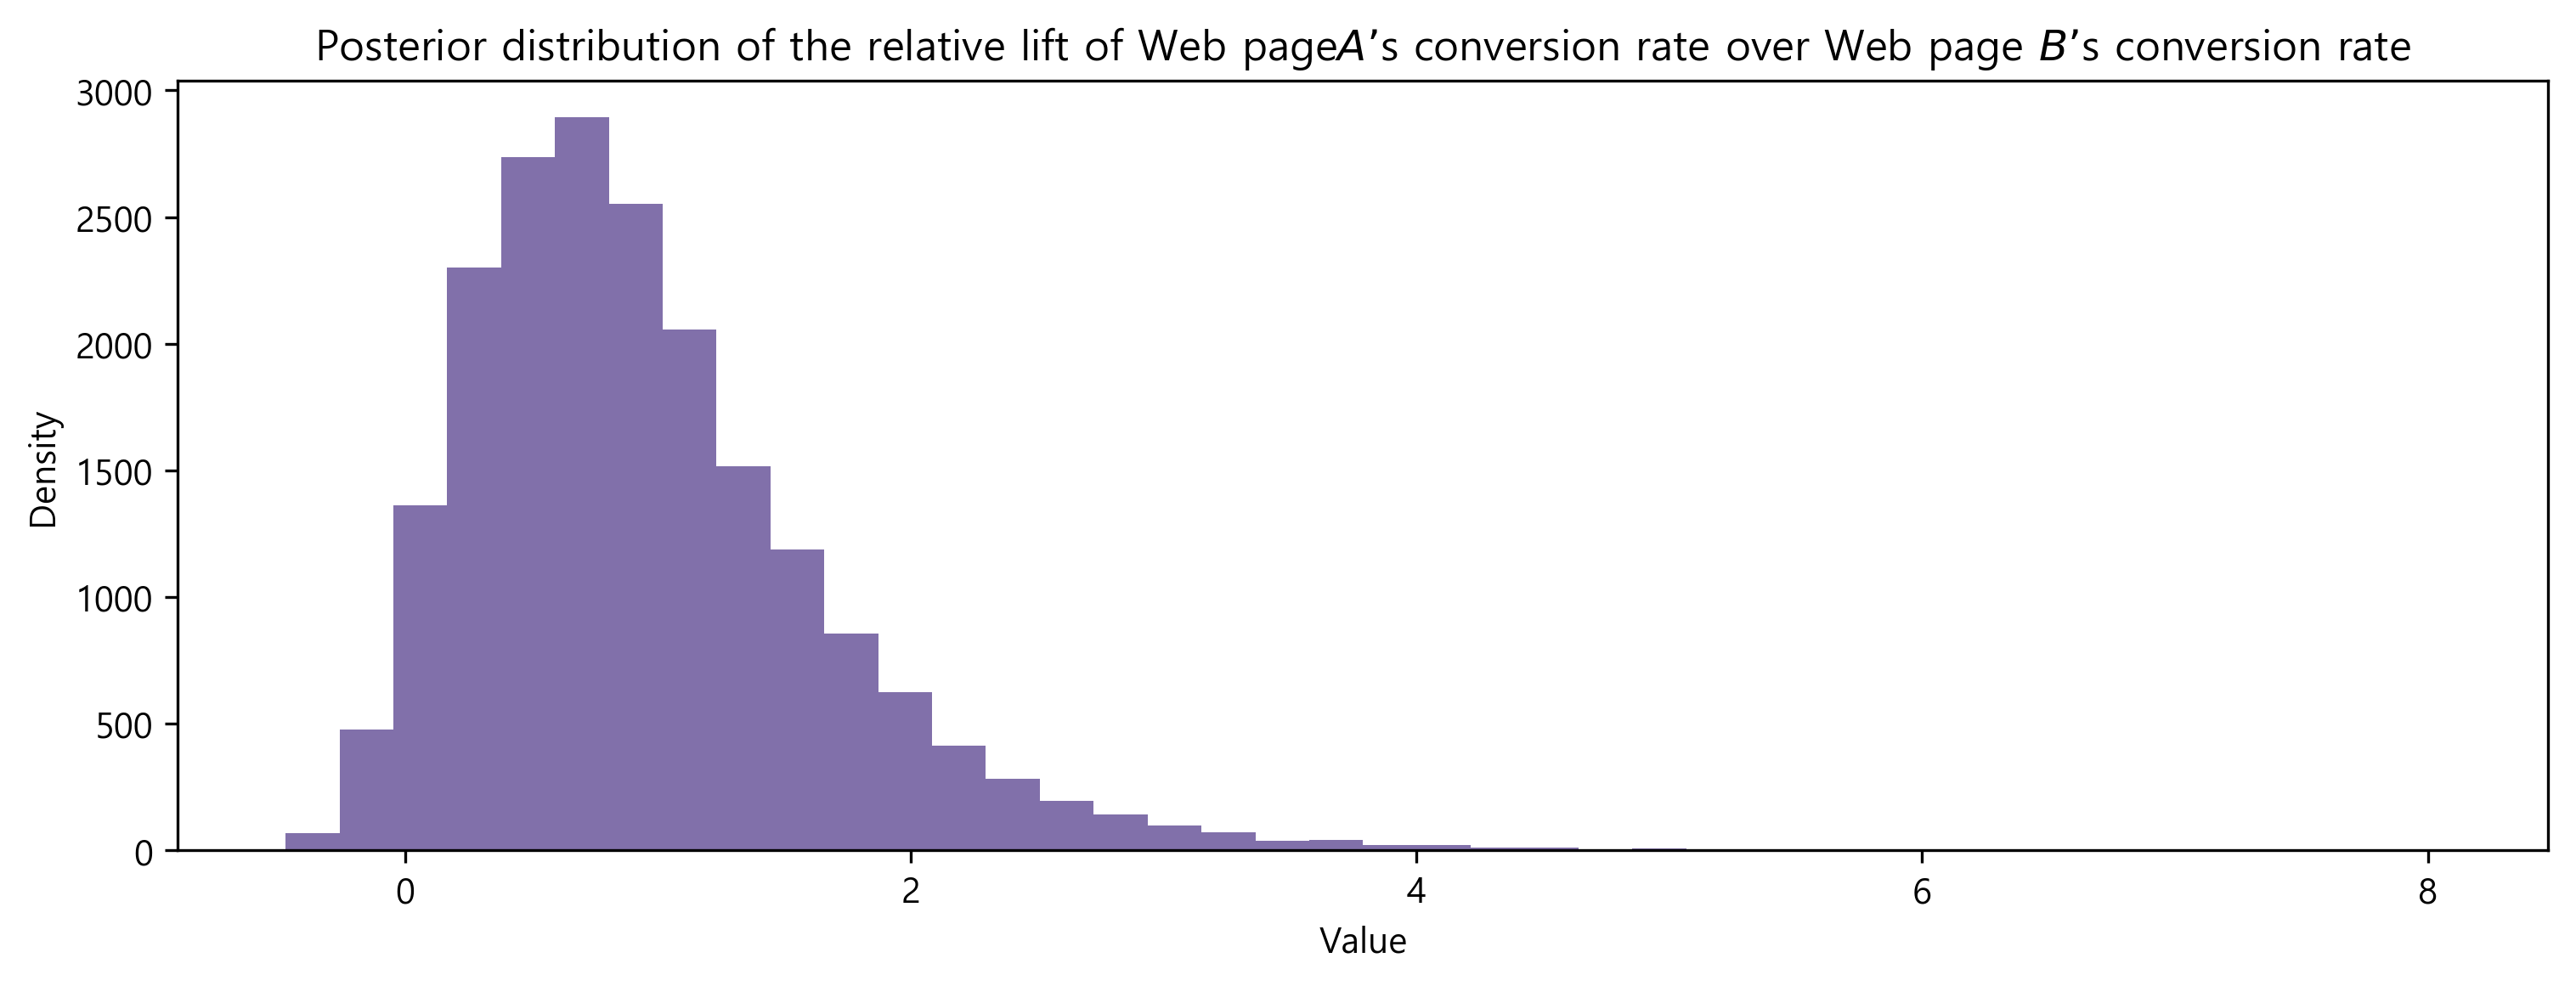

In [23]:
def relative_increase(a,b):
    return (a-b)/b
posterior_rel_increase = relative_increase(samples_posterior_A,
samples_posterior_B)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Posterior distribution of the relative lift of Web page\
$A$’s conversion rate over Web page $B$’s conversion rate")
_hist(posterior_rel_increase, 'relative increase', color='#7A68A6');

In [24]:
print ((posterior_rel_increase > 0.2).mean())
print ((posterior_rel_increase > 0.5).mean())

0.8885
0.71355


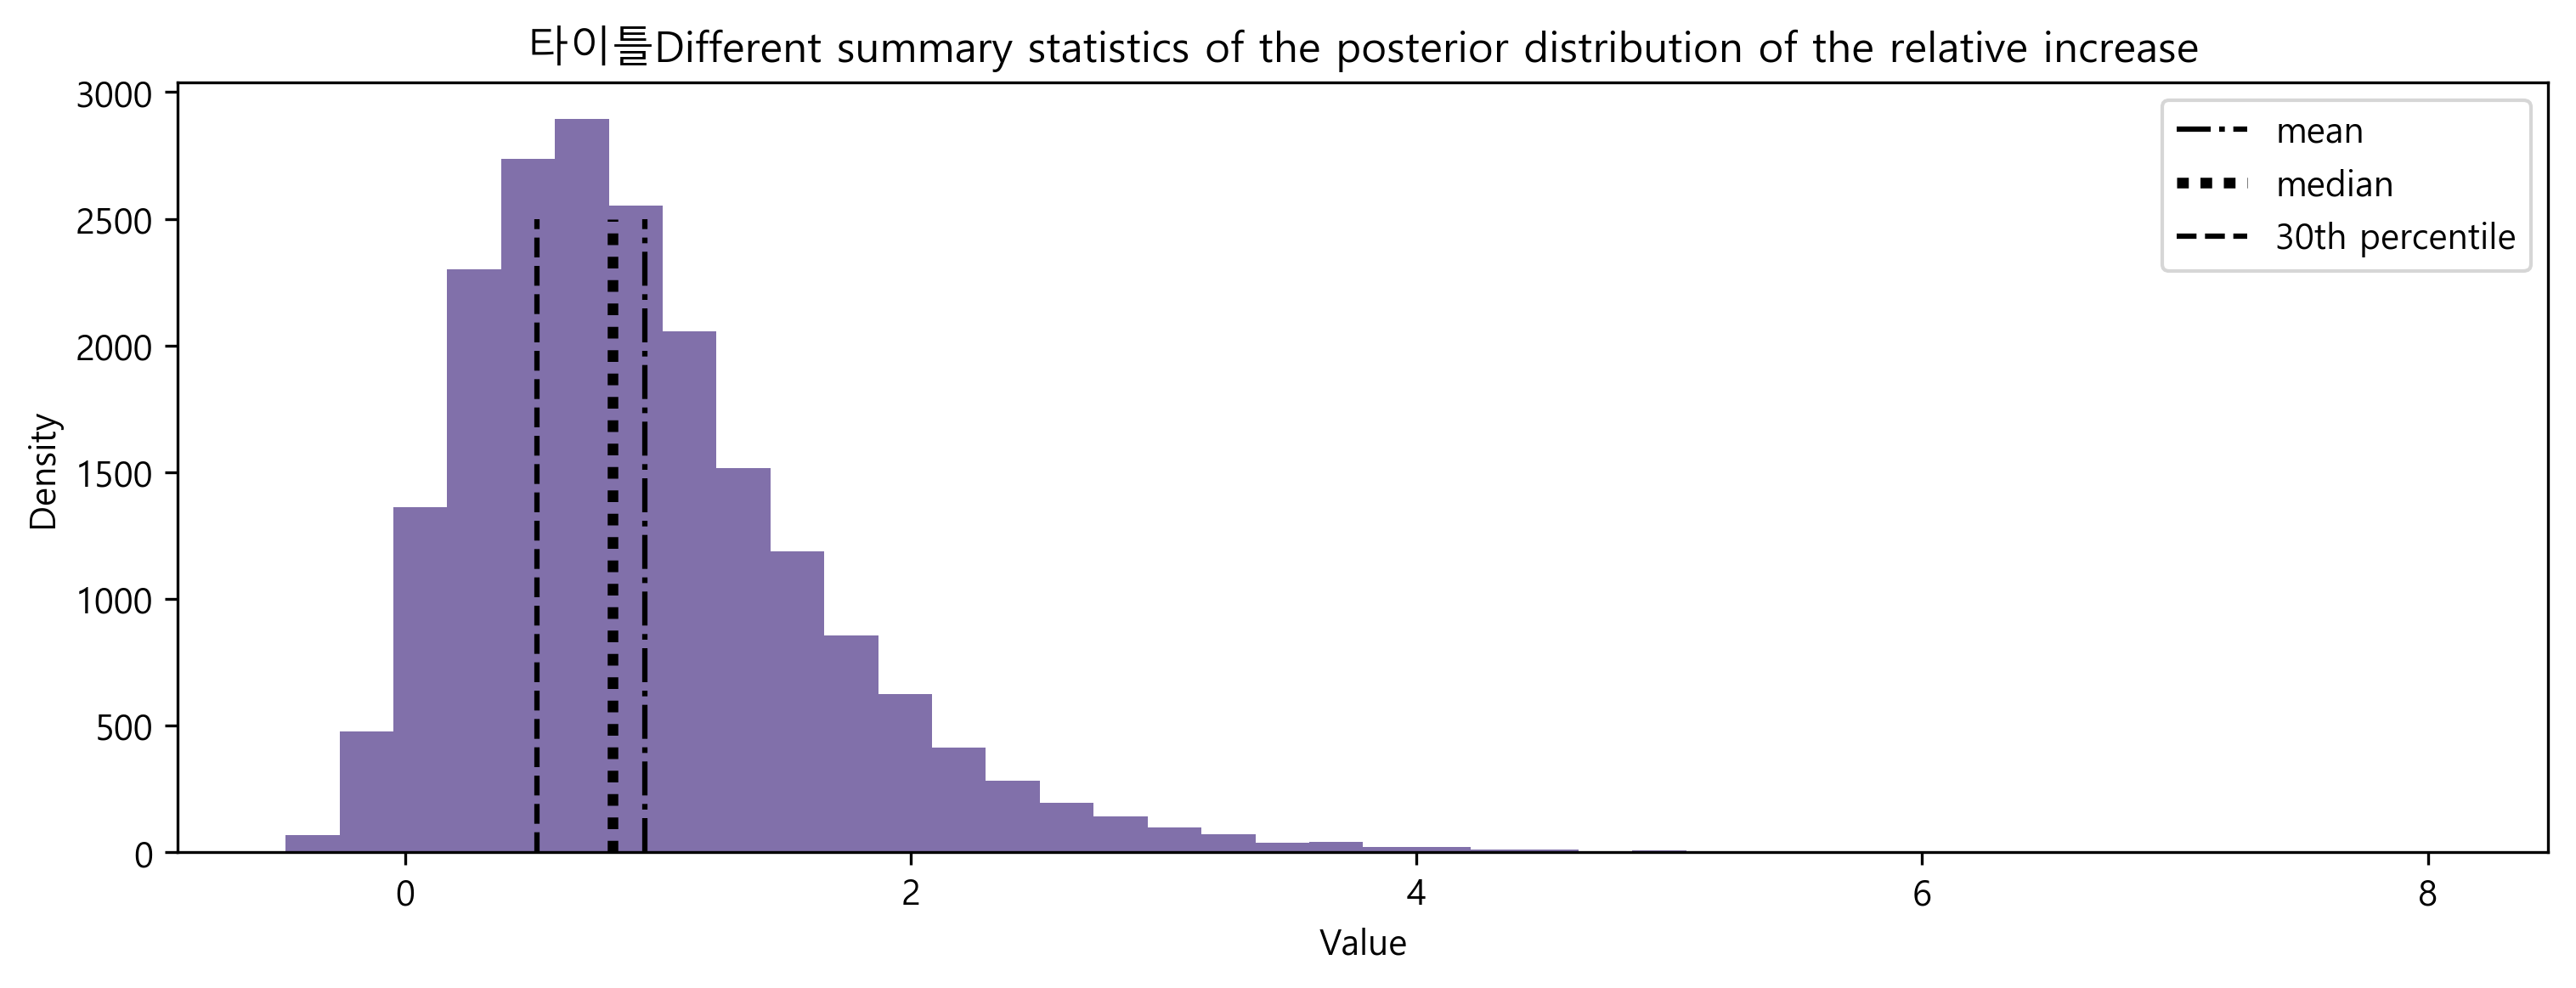

In [25]:
mean = posterior_rel_increase.mean()
median = np.percentile(posterior_rel_increase, 50)
conservative_percentile = np.percentile(posterior_rel_increase, 30)
_hist(posterior_rel_increase,'', color='#7A68A6');
plt.vlines(mean, 0, 2500, linestyles='-.', label='mean')
plt.vlines(median, 0, 2500, linestyles=':', label='median', lw=3)
plt.vlines(conservative_percentile, 0, 2500, linestyles='--',
label='30th percentile')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("타이틀Different summary statistics of the posterior distribution of the relative increase")
plt.legend();